In [88]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from PIL import report

In [89]:
train_dir = '../data/train'
results_dir = '../results'
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [90]:
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Đếm số lượng ảnh trong mỗi lớp
counts = [len(os.listdir(os.path.join(train_dir, emotion))) for emotion in emotions]

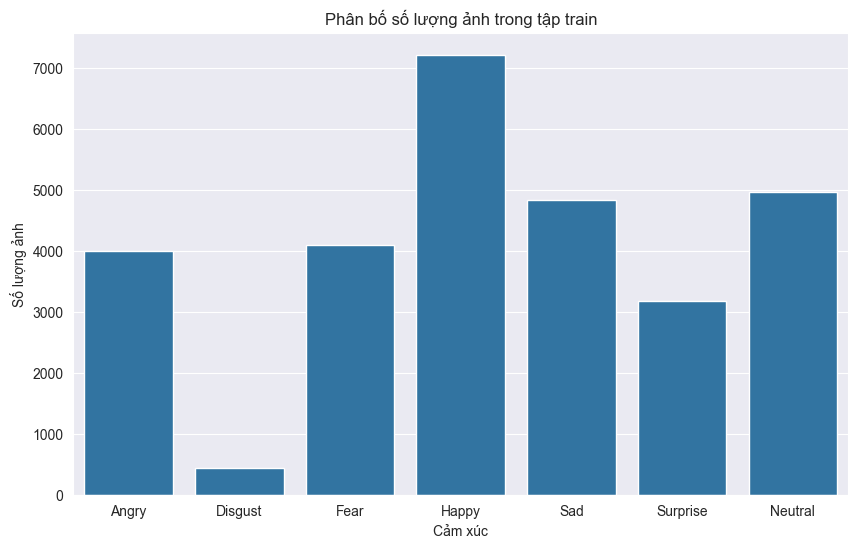

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x=emotions, y=counts)
plt.title('Phân bố số lượng ảnh trong tập train')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng ảnh')
plt.savefig(os.path.join(results_dir, 'train_data_distribution.png'))
plt.show()

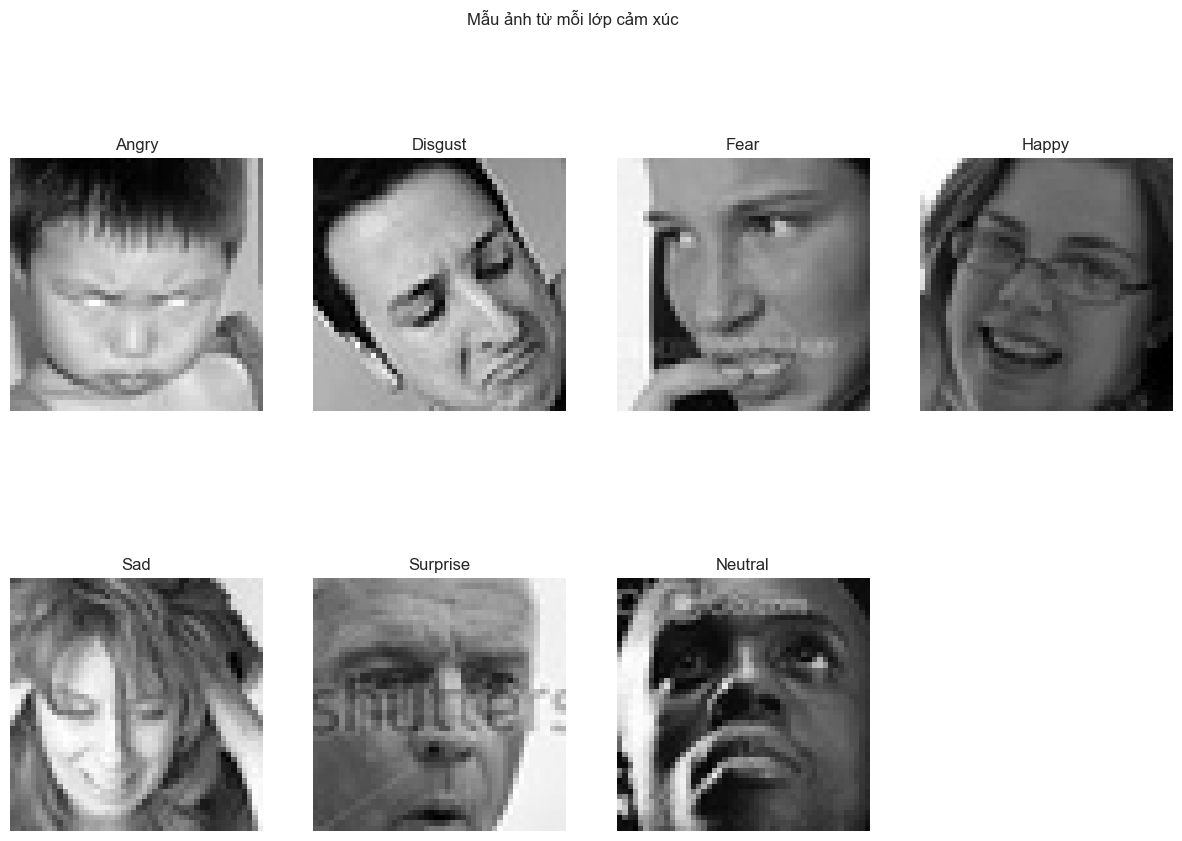

In [92]:
plt.figure(figsize=(15, 10))
for i, emotion in enumerate(emotions):
    folder = os.path.join(train_dir, emotion)
    img_name = os.listdir(folder)[0]  # Lấy ảnh đầu tiên
    img_path = os.path.join(folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')
plt.suptitle('Mẫu ảnh từ mỗi lớp cảm xúc')
plt.savefig(os.path.join(results_dir, 'sample_images.png'))
plt.show()

In [93]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Chia 20% tập train làm validation
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [94]:
from keras import Input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [95]:
model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])


In [96]:
val_images, val_labels = next(validation_generator)  # Lấy một batch
predictions = model.predict(val_images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


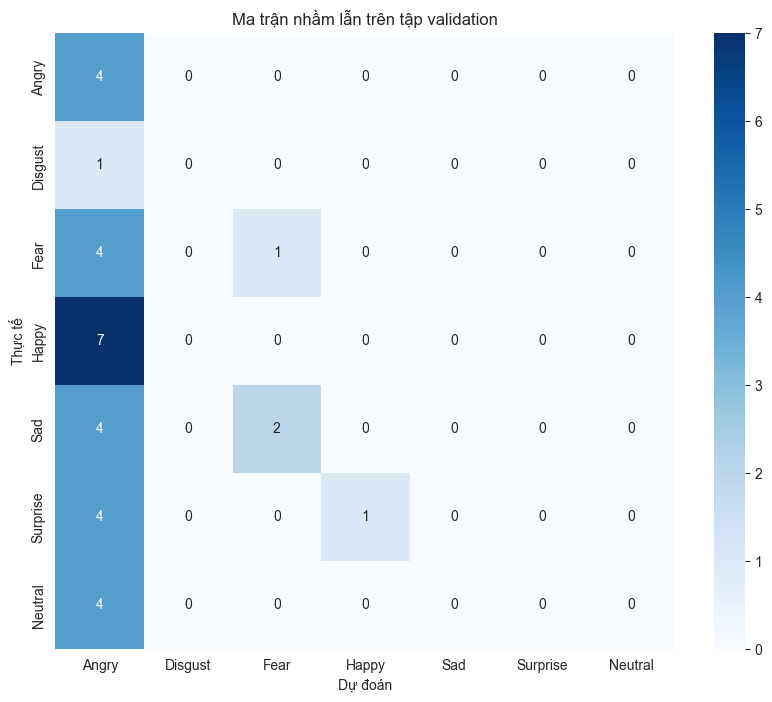

In [97]:
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotions, yticklabels=emotions, cmap='Blues')
plt.title('Ma trận nhầm lẫn trên tập validation')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.savefig(os.path.join(results_dir, 'confusion_matrix.png'))
plt.show()

In [98]:
from sklearn.metrics import classification_report

report = classification_report(
    true_labels,
    pred_labels,
    labels=list(range(len(emotions))),
    target_names=emotions,
    output_dict=True
)


C:\Users\Quan\PycharmProjects\PythonProject2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Quan\PycharmProjects\PythonProject2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Quan\PycharmProjects\PythonProject2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [99]:
model.save(os.path.join(results_dir, 'explore_model.h5'))

print("Phân tích hoàn tất! Kết quả được lưu trong thư mục 'results/'.")

Phân tích hoàn tất! Kết quả được lưu trong thư mục 'results/'.
